In [100]:
import numpy as np
import math

In [101]:
inputs = np.array([1, 2, 3.5])
weights = np.array([0.5, 0.5, 1.8])
bias = np.array([0.0])
layer_1 = 0
target = 0

In [102]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [103]:
def make_prediction(input_layer, weights_params, bias_params):
  global layer_1
  layer_1 = np.dot(inputs, weights) + bias
  layer_2 = sigmoid(layer_1)
  return layer_2

In [104]:
# Mean Square Error is square root of prediction less target

In [105]:
prediction = make_prediction(inputs, weights, bias)

In [106]:
mse = np.square(prediction - target)
derivative = 2 * mse
weights = weights - derivative

In [107]:
print(f"Prediction is: {prediction}, Mean Squared Error is: {mse}")

Prediction is: [0.99959043], Mean Squared Error is: [0.99918103]


In [108]:
class NeuralNetwork:
  def __init__(self, learning_rate):
    self.weights = np.array([np.random.randn(), np.random.randn()])
    self.bias = np.random.randn()
    self.learning_rate = learning_rate

  def sigmoid(self, x):
    return 1/(1+np.exp(-x))

  def sigmoid_derivative(self, x):
    return self.sigmoid(x) * (1 - self.sigmoid(x))

  def predict(self, input_vector):
    layer_1 = np.dot(input_vector, self.weights) + self.bias
    layer_2 = self.sigmoid(layer_1)
    prediction = layer_2
    return prediction

  def compute_gradients(self, input_vector, target):
    layer_1 = np.dot(input_vector, self.weights) + self.bias
    layer_2 = self.sigmoid(layer_1)
    prediction = layer_2

    derror_dprediction = 2 * (prediction - target)
    dprediction_dlayer1 = self.sigmoid_derivative(layer_1)
    dlayer1_bias = 1
    dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

    derror_dbias = (derror_dprediction * dprediction_dlayer1 * dlayer1_bias)
    derror_dweights = (derror_dprediction * dprediction_dlayer1 * dlayer1_dweights)

    return derror_dbias, derror_dweights

  def update_parameters(self, derror_dbias, derror_dweights):
    self.bias = self.bias - (derror_dbias * self.learning_rate)
    self.weights = self.weights - (derror_dweights * self.learning_rate)

  def train(self, input_vectors, targets, iterations):
    cumulative_errors = []
    for current_iteration in range(iterations):
      # select a random data instance
      # target in this instance is the dependent variable while input_vectors
      # are the features or independent variable
      random_data_index = np.random.randint(len(input_vectors))
      input_vector = input_vectors[random_data_index]
      target = targets[random_data_index]

      # compute the gradients and update the weights
      derror_dbias, derror_dweights = self.compute_gradients(input_vector, target)

      self.update_parameters(derror_dbias, derror_dweights)

      # Measure the cumulative error for all the instances
      if current_iteration % 100 == 0:
        cumulative_error = 0
        # Loop through all the instances to measure the error
        for data_instance_index in range(len(input_vectors)):
          data_point = input_vectors[data_instance_index]
          target = targets[data_instance_index]

          prediction = self.predict(data_point)
          error = np.square(prediction - target)

          cumulative_error = cumulative_error + error
        cumulative_errors.append(cumulative_error)

    return cumulative_errors

In [109]:
#learning_rate = 0.001
#ann = NeuralNetwork(learning_rate=learning_rate)
#ann.predict(input_vector=inputs)

In [124]:
import matplotlib.pyplot as plt

input_vectors = np.array([[3, 1.5],[2, 1],[4, 1.5],[3, 4],[3.5, 0.5],[2, 0.5],[5.5, 1],[1, 1]])

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.01

ann = NeuralNetwork(learning_rate)

training_error = ann.train(input_vectors, targets, 10000)

In [120]:
print(training_error)

[2.3935849359974473, 2.2319479690595196, 2.1890730593464816, 2.180962547871623, 2.1810556835252277, 2.191291911979357, 2.1784649119407726, 2.1820253686478823, 2.1505423868552365, 2.144658538382409, 2.14910067964665, 2.1371375265541523, 2.128904454028692, 2.124708180382848, 2.1190097226859432, 2.1120858677336947, 2.1097316723992345, 2.103318965342685, 2.1024747288688017, 2.092134710171538, 2.086065975358541, 2.084798913531626, 2.077981829181556, 2.0757927222398536, 2.082153478020389, 2.069952491822074, 2.0678121405590915, 2.0657597137532377, 2.060067353618845, 2.068768971701084, 2.0538547634517776, 2.053782148106445, 2.0466810258528882, 2.0540341705560996, 2.095261047203865, 2.030991370030439, 2.033705002828603, 2.028714451198154, 2.0528535732073148, 2.0679873702371827, 2.051470100003758, 2.02637960182598, 2.036621994611157, 2.0361107455266514, 2.0022179735171, 2.0030437201766937, 2.0016485439701213, 1.993374775803897, 2.0076505549908648, 1.991462297093756, 2.0399758980414933, 2.0124671

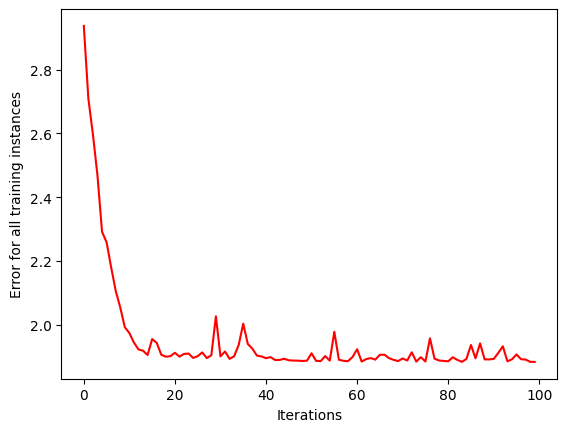

In [125]:
plt.plot(training_error, c="r")
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.show()